In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 

from __future__ import print_function

{

In [21]:
import pandas 

my_cols = [ str( i ) for i in [ 
    u'total_score', u'fa_rep', u'hbond_sc', u'tot_pstat_pm', u'tot_nlpstat_pm', u'tot_burunsat_pm', u'tot_hbond_pm', u'tot_NLconts_pm', u'tot_nlsurfaceE_pm', u'tot_total_charge',
    u'SR_1_total_score', u'SR_1_fa_rep', u'SR_1_hbond_sc', u'SR_1_hbond_pm', u'SR_1_burunsat_pm', u'SR_1_pstat_pm', u'SR_1_nlpstat_pm', 
    u'SR_2_total_score', u'SR_2_fa_rep', u'SR_2_hbond_sc', u'SR_2_hbond_pm', u'SR_2_burunsat_pm', u'SR_2_pstat_pm', u'SR_2_nlpstat_pm',
    u'SR_3_total_score', u'SR_3_fa_rep', u'SR_3_hbond_sc', u'SR_3_hbond_pm', u'SR_3_burunsat_pm', u'SR_3_pstat_pm', u'SR_3_nlpstat_pm', 
    u'SR_4_total_score', u'SR_4_fa_rep', u'SR_4_hbond_sc', u'SR_4_hbond_pm', u'SR_4_burunsat_pm', u'SR_4_pstat_pm', u'SR_4_nlpstat_pm',
    u'SR_5_total_score', u'SR_5_fa_rep', u'SR_5_hbond_sc', u'SR_5_interf_E_1_2', u'SR_5_dsasa_1_2', u'SR_5_hbond_pm', u'SR_5_burunsat_pm', 
] ]

E = pandas.read_csv( 'data_sets/experimental/expr_144_mutants.csv', index_col='mutant' ) 
#F = pandas.read_csv( 'data_sets/calculated/enzyme_design_talaris_2014.csv', index_col='name', usecols=my_cols+['name'] ) 
F = pandas.read_csv( 'data_sets/calculated/enzyme_design_talaris_2014.csv', usecols=my_cols+['name'] ) 
F = F.groupby( 'name' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ) ) 
F.index = F.name
J = E.join( F ).dropna().drop( 'name', axis=1 ) 

X = J.drop( 'expression', axis=1 )
y = J.expression

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}

Grid scores on development set:

0.718 (+/-0.046) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.709 (+/-0.142) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.735 (+/-0.033) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.711 (+/-0.053) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.769 (+/-0.052) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.723 (+/-0.046) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.790 (+/-0.057) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.755 (+/-0.040) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.731 (+/-0.054) for {'kernel': 'linear', 'C': 1}
0.714 (+/-0.060) for {'kernel': 'linear', 'C': 10}
0.732 (+/-0.033) for {'kernel': 'linear', 'C': 100}
0.717 (+/-0.068) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed

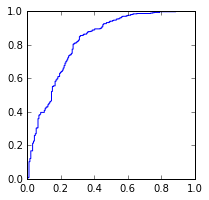


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}

Grid scores on development set:

0.686 (+/-0.041) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.726 (+/-0.019) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.704 (+/-0.016) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.681 (+/-0.048) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
0.744 (+/-0.049) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
0.684 (+/-0.039) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
0.773 (+/-0.058) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
0.711 (+/-0.039) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
0.678 (+/-0.034) for {'kernel': 'linear', 'C': 1}
0.635 (+/-0.057) for {'kernel': 'linear', 'C': 10}
0.632 (+/-0.057) for {'kernel': 'linear', 'C': 100}
0.635 (+/-0.031) for {'kernel': 'linear', 'C': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

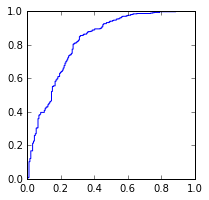

In [22]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1, class_weight='balanced'), tuned_parameters, cv=3,
                       scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    y_desc = clf.decision_function(X_test) 
    tpr, fpr, __ = roc_curve( y_true, y_desc ) 
    plt.figure( figsize=( 3,3 ) ) 
    plt.plot( tpr, fpr ) 
    plt.show()
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.